In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize

In [14]:
# Step 1: Load Dataset
df = pd.read_csv("C:/Users/Rishitha.G/Downloads/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
# Step 2: Identify Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['gender', 'smoking_history'], dtype='object')


In [16]:
# Step 3: Handle Missing Values
print("Missing Values Before Handling:")
print(df.isna().sum())

df.replace(['???', 'Unknown'], np.nan, inplace=True)
df.dropna(inplace=True)

print("Missing Values After Handling:")
print(df.isna().sum())

Missing Values Before Handling:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Missing Values After Handling:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [17]:
# Step 4: Apply One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity
encoded = encoder.fit_transform(df[['gender', 'smoking_history']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['gender', 'smoking_history']))

df = pd.concat([df.drop(['gender', 'smoking_history'], axis=1), encoded_df], axis=1)
print("One-Hot Encoding Applied Successfully!")
df

One-Hot Encoding Applied Successfully!


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,0,0,17.37,6.5,100,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,66.0,0,0,27.83,5.7,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,24.0,0,0,35.42,4.0,100,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Step 5: Standardize Features
scaler = StandardScaler()
df['blood_glucose_level'] = scaler.fit_transform(df['blood_glucose_level'].values.reshape(-1,1))
scaler = MinMaxScaler()
df[['bmi', 'age']] = scaler.fit_transform(df[['bmi', 'age']])
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.177171,6.6,0.047704,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.674675,0,0,0.202031,6.6,-1.426210,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.349349,0,0,0.202031,5.7,0.489878,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449449,0,0,0.156863,5.0,0.416183,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949950,1,1,0.118231,4.8,0.416183,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.000000,0,0,0.202031,6.2,-1.180558,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.024024,0,0,0.085901,6.5,-0.934905,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.824825,0,0,0.207983,5.7,0.416183,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.299299,0,0,0.296569,4.0,-0.934905,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Step 6: Detect and Handle Outliers
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

outliers_iqr = detect_outliers_iqr(df)
for col, outlier_values in outliers_iqr.items():
    print(f"Outliers in {col}: {outlier_values.values}")
df

Outliers in age: []
Outliers in hypertension: [1 1 1 ... 1 1 1]
Outliers in heart_disease: [1 1 1 ... 1 1 1]
Outliers in bmi: [0.52159197 0.04645191 0.54178338 ... 0.58951914 0.41013072 0.35807656]
Outliers in HbA1c_level: [9.  9.  8.8 ... 9.  9.  8.8]
Outliers in blood_glucose_level: [2.99553263 3.9781421  3.48683736 ... 3.9781421  3.9781421  3.48683736]
Outliers in diabetes: [1 1 1 ... 1 1 1]
Outliers in gender_Male: []
Outliers in gender_Other: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Outliers in smoking_history_current: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_ever: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_former: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_never: []
Outliers in smoking_history_not current: [1. 1. 1. ... 1. 1. 1.]


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.177171,6.6,0.047704,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.674675,0,0,0.202031,6.6,-1.426210,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.349349,0,0,0.202031,5.7,0.489878,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449449,0,0,0.156863,5.0,0.416183,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949950,1,1,0.118231,4.8,0.416183,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.000000,0,0,0.202031,6.2,-1.180558,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.024024,0,0,0.085901,6.5,-0.934905,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.824825,0,0,0.207983,5.7,0.416183,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.299299,0,0,0.296569,4.0,-0.934905,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


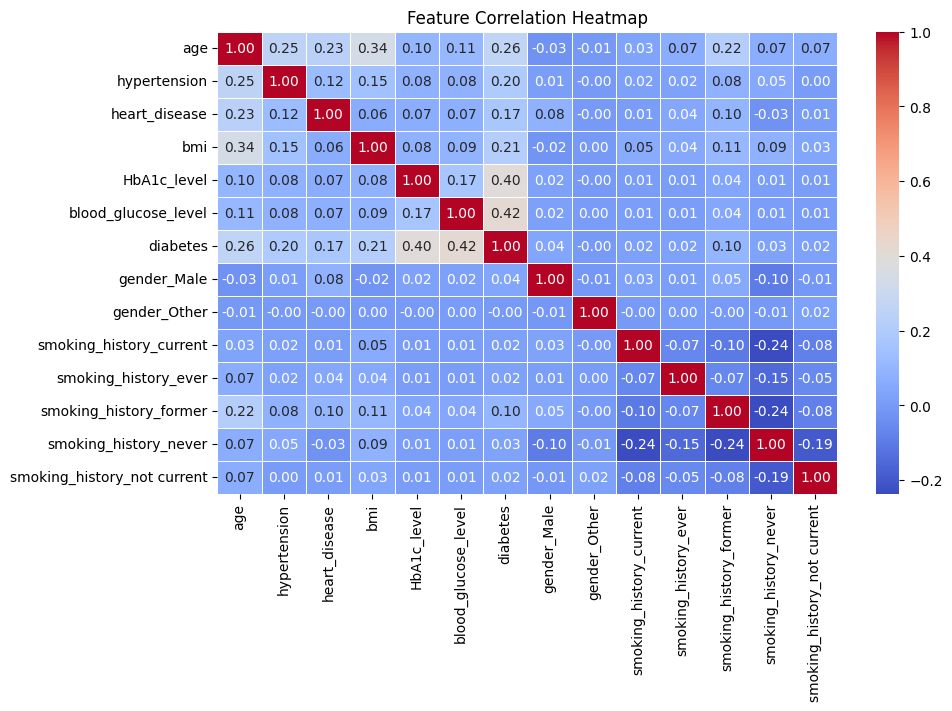


No Highly Correlated Features Found, but heatmap is displayed.


In [11]:
# Step 7: Handle and Visualize Highly Correlated Features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Detecting highly correlated features
corr_matrix = df.corr()
thresh = 0.75
high_corr = [(i, j, corr_matrix.loc[i, j]) 
             for i in corr_matrix.columns 
             for j in corr_matrix.columns 
             if i != j and abs(corr_matrix.loc[i, j]) > thresh]

if high_corr:
    print("\nHighly Correlated Feature Pairs:")
    for i, j, corr in high_corr:
        print(f"{i} and {j} → correlation = {corr:.2f}")
else:
    print("\nNo Highly Correlated Features Found, but heatmap is displayed.")


In [20]:
# Step 8: Feature Importance Analysis
X = df.drop('diabetes', axis=1)
y = df['diabetes']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

print("\nFeature Importance:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")



Feature Importance:
HbA1c_level: 0.3976
blood_glucose_level: 0.3317
bmi: 0.1231
age: 0.0997
hypertension: 0.0143
heart_disease: 0.0100
gender_Male: 0.0061
smoking_history_never: 0.0046
smoking_history_former: 0.0041
smoking_history_current: 0.0032
smoking_history_not current: 0.0027
smoking_history_ever: 0.0026
gender_Other: 0.0000


In [21]:
# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-Test Split Completed!", X_train.shape, X_test.shape)

Train-Test Split Completed! (80000, 13) (20000, 13)


Balanced dataset class distribution:
diabetes
0    8500
1    8500
Name: count, dtype: int64


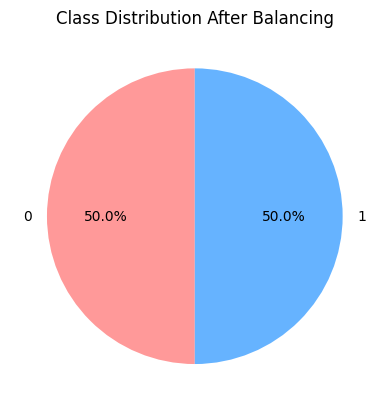

In [22]:
# Step 10: Address Class Imbalance
undersampler = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['diabetes'])], axis=1)

print("Balanced dataset class distribution:")
print(df_balanced['diabetes'].value_counts())

df_balanced['diabetes'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["#ff9999", "#66b3ff"])
plt.title("Class Distribution After Balancing")
plt.ylabel("")  # Hides the y-label for cleaner output
plt.show()


Balanced Dataset: diabetes
0    91500
1    91500
Name: count, dtype: int64


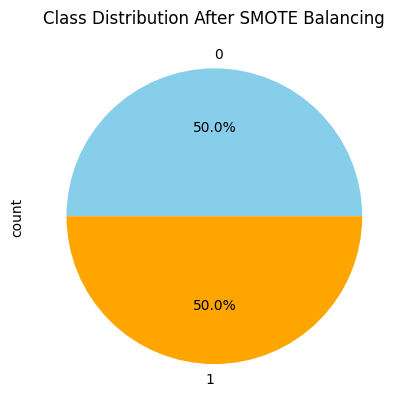

In [23]:
# Step 10: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['diabetes'])], axis=1)

print("Balanced Dataset:", df_balanced['diabetes'].value_counts())

# Visualize class distribution after SMOTE balancing
df_balanced['diabetes'].value_counts().plot.pie(autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Class Distribution After SMOTE Balancing")
plt.show()